In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

data = pd.read_excel('Monthly_CO2_Concentrations.xlsx', converters={'Year': np.int32, 'Month': np.int32})
data.head()

,CO2,Year,Month
0,333.13,1974,5
1,332.09,1974,6
2,331.10,1974,7
3,329.14,1974,8
4,327.36,1974,9


In [2]:
data = data[(~pd.isnull(data['CO2']))&\
                (~pd.isnull(data['Year']))&\
                (~pd.isnull(data['Month']))]
data.sort_values(['Year', 'Month'], inplace=True)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 10 Text xticklabel objects>)

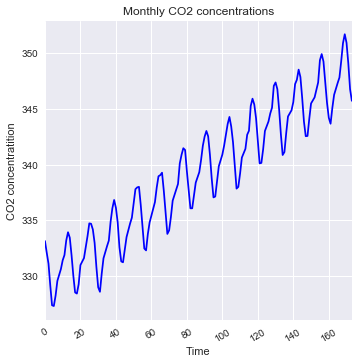

In [3]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

(array([ 70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <a list of 7 Text xticklabel objects>)

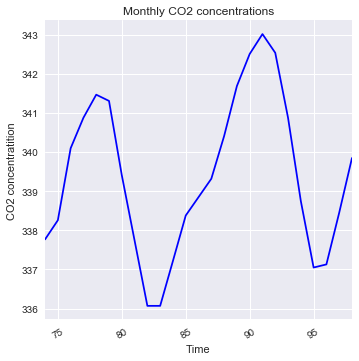

In [4]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'][(data['Year']==1980) |(data['Year']==1981)].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

In [5]:
from sklearn.linear_model import LinearRegression
trend_model = LinearRegression(normalize=True, fit_intercept=True)
trend_model.fit(np.array(data.index).reshape((-1,1)), data['CO2'])
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0], trend_model.intercept_))

Trend model coefficient=0.11182207854546031 and intercept=329.4554222337025


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 10 Text xticklabel objects>)

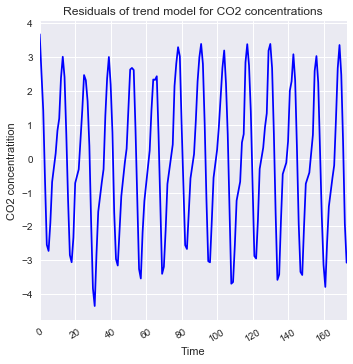

In [6]:
residuals = np.array(data['CO2']) - trend_model.predict(np.array(data.index).reshape((-1,1)))
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=data.index).plot(color='b')
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

In [7]:
import time

In [8]:
data['Residuals'] = residuals
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                    4: 'Q2', 5: 'Q2', 6: 'Q2',
                    7: 'Q3', 8: 'Q3', 9: 'Q3',
                    10: 'Q4', 11: 'Q4', 12: 'Q4'}
#data['Quarter'] = data['Month'].map(lambda m: month_quarter_map.get(m))

start_time = time.time()
data['Quarter'] = data['Month'].apply(lambda m: month_quarter_map[m])
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.002619504928588867 seconds ---


In [9]:
start_time = time.time()
data['Quarter'] = data['Month'].map(lambda m: month_quarter_map.get(m))
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0015518665313720703 seconds ---


In [10]:
data.head()

,CO2,Year,Month,Residuals,Quarter
0,333.13,1974,5,3.674578,Q2
1,332.09,1974,6,2.522756,Q2
2,331.10,1974,7,1.420934,Q3
3,329.14,1974,8,-0.650888,Q3
4,327.36,1974,9,-2.542711,Q3


In [11]:
seasonal_sub_series_data = data.groupby(by=['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std])
seasonal_sub_series_data.columns = ['Quarterly Mean', 'Quarterly Standard Deviation']

In [12]:
seasonal_sub_series_data.head()

Quarterly Mean  Quarterly Standard Deviation
Year Quarter                                              
1974 Q2             3.098667                      0.814461
     Q3            -0.590888                      1.982503
     Q4            -1.769688                      1.024070
1975 Q1             0.723024                      0.520922
     Q2             2.600891                      0.355315

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text xticklabel objects>)

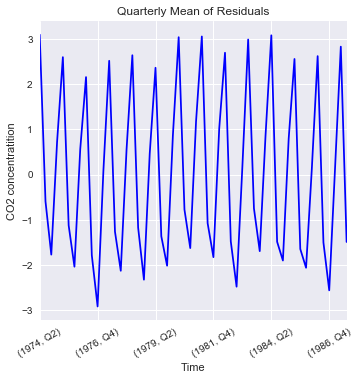

In [13]:
#plot quarterly mean of residuals
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Mean'].plot(color='b')
plt.title('Quarterly Mean of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text xticklabel objects>)

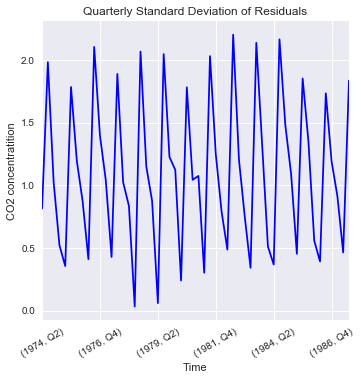

In [14]:
#plot quarterly standard deviation of residuals
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Standard Deviation'].plot(color='b')
plt.title('Quarterly Standard Deviation of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

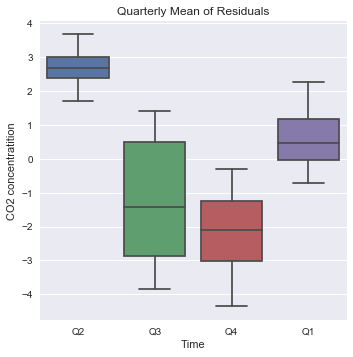

In [15]:
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=data, y='Residuals', x='Quarter')
g.set_title('Quarterly Mean of Residuals')
g.set_xlabel('Time')
g.set_ylabel('CO2 concentratition')

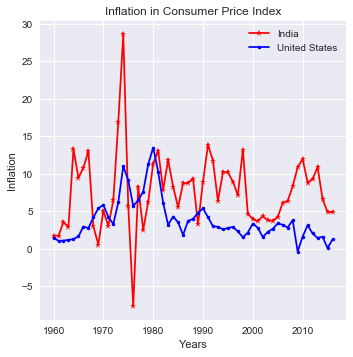

In [16]:
inflation = pd.read_excel('inflation-consumer-prices-annual.xlsx', parse_dates=['Year'])
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(1960,2017), inflation['India'], linestyle='-', marker='*',
color='r')
plt.plot(range(1960,2017), inflation['United States'], linestyle='-',
marker='.', color='b')
plt.legend(['India','United States'], loc=1)
plt.title('Inflation in Consumer Price Index')
plt.ylabel('Inflation')
plt.xlabel('Years')

In [17]:
zero_mean_series = np.random.normal(loc=0.0, scale=1., size=100)

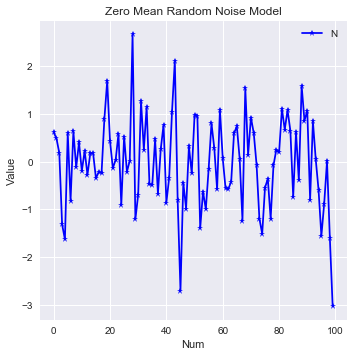

In [18]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(np.arange(100), zero_mean_series, linestyle='-', marker='*', color='b')
plt.legend('Noise', loc=1)
plt.title('Zero Mean Random Noise Model')
plt.xlabel('Num')
plt.ylabel('Value')

/home/aspiring1/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


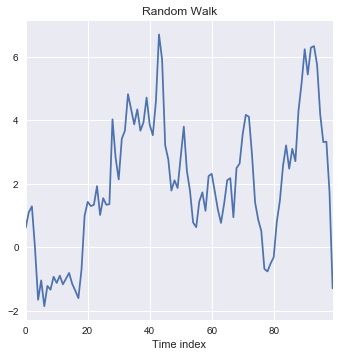

In [19]:
random_walk = np.cumsum(zero_mean_series)
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(random_walk)
g.set_title('Random Walk')
g.set_xlabel('Time index')

In [20]:
djia_df = pd.read_excel('DJIA_Jan2016_Dec2016.xlsx')
djia_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000
5,2016-01-11,16358.709961,16461.849609,16232.030273,16398.570313,16398.570313,127790000
6,2016-01-12,16419.109375,16591.349609,16322.070313,16516.220703,16516.220703,117480000
7,2016-01-13,16526.630859,16593.509766,16123.200195,16151.410156,16151.410156,153530000
8,2016-01-14,16159.009766,16482.050781,16075.120117,16379.049805,16379.049805,158830000
9,2016-01-15,16354.330078,16354.330078,15842.110352,15988.080078,15988.080078,239210000


/home/aspiring1/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


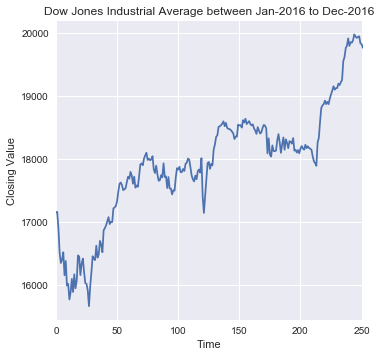

In [21]:
plt.figure(figsize = (5.5, 5.5))
g = sns.tsplot(djia_df['Close'])
g.set_title('Dow Jones Industrial Average between Jan-2016 to Dec-2016')
g.set_xlabel('Time')
g.set_ylabel('Closing Value')

In [22]:
lag = range(0, 31)
djia_acf = []
for l in lag:
    djia_acf.append(djia_df['Close'].autocorr(l))

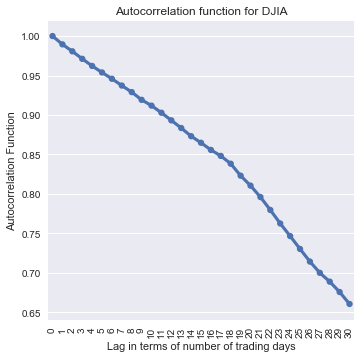

In [25]:
plt.figure(figsize = (5.5, 5.5))
g = sns.pointplot(x=list(lag), y=djia_acf, markers = '.')
g.set_title('Autocorrelation function for DJIA')
g.set_xlabel('Lag in terms of number of trading days')
g.set_ylabel('Autocorrelation Function')
g.set_xticklabels(lag, rotation = 90)

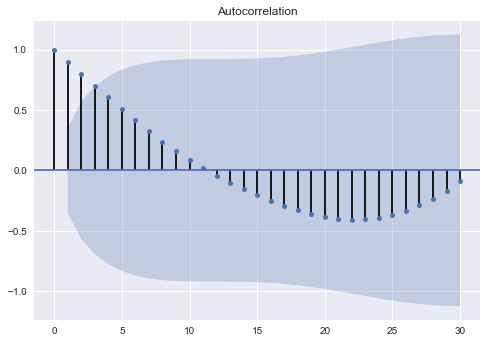

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(djia_acf, lags = lag)
plt.show()